In [20]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [23]:
max_features = 10000 # size of vocabulary (one-hot encoding)
embedding_vector_size = 32 # embed vocabulary into float vector
maxlen = 500 # max length of reviews (in terms of number of words)
batch_size = 64

In [24]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), ' training sequences of shape ', x_train.shape)
print(len(x_test), ' test sequences of shape ', x_test.shape)

25000  training sequences of shape  (25000,)
25000  test sequences of shape  (25000,)


In [25]:
x_train = sequence.pad_sequences(x_train)
x_test = sequence.pad_sequences(x_test)
print('Training sequences\' shape: ', x_train.shape)
print('Test sequences\' shape: ', x_test.shape)

Training sequences' shape:  (25000, 2494)
Test sequences' shape:  (25000, 2315)


In [26]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, embedding_vector_size))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=2, 
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 190s 10ms/step - loss: 0.5321 - acc: 0.7274 - val_loss: 0.3943 - val_acc: 0.8376
Epoch 2/2
20000/20000 [==============================] - 197s 10ms/step - loss: 0.3383 - acc: 0.8605 - val_loss: 0.3657 - val_acc: 0.8484


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

In [35]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [36]:
epochs = range(1, len(acc) + 1)

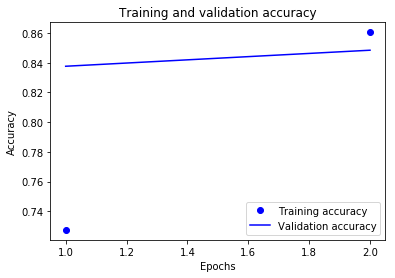

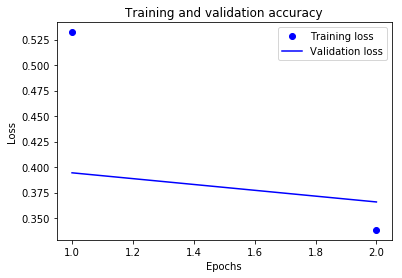

In [39]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()